In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

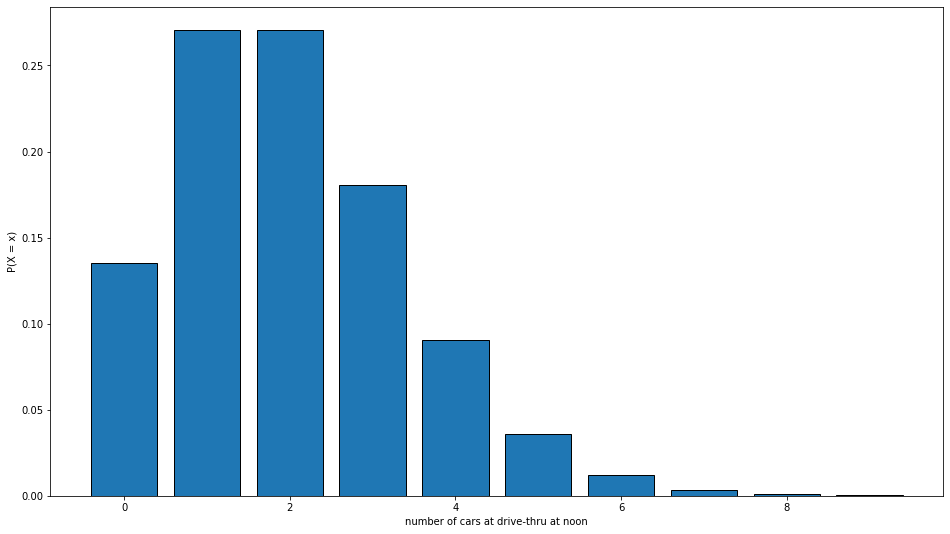

In [8]:
plt.figure(figsize=(16, 9))
x = np.arange(0, 10)
y = stats.poisson(2).pmf(x)

plt.bar(x, y, ec='black')
plt.ylabel('P(X = x)')
plt.xlabel('number of cars at drive-thru at noon')
plt.show()

### What is the probability that no cars drive up in the noon hour?

In [11]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [10]:
# Experimental

cars = np.random.poisson(2, 10_000)
(cars == 0).mean()

0.1346

### What is the probability that 3 or more cars come through the drive through?

In [11]:
stats.poisson(2).sf(2)

0.32332358381693654

In [13]:
# Experimental

cars = np.random.poisson(2, 10_000)
(cars >= 3).mean()

0.32

### How likely is it that the drive through gets at least 1 car?

In [16]:
stats.poisson(2).sf(0)

0.8646647167633873

In [17]:
# Experimental

cars = np.random.poisson(2, 10_000)
(cars > 0).mean()

0.8689

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

### What grade point average is required to be in the top 5% of the graduating class?

In [18]:
µ = 3.0
σ = .3

stats.norm(μ, σ).isf(.05)

3.4934560880854417

In [23]:
# Experimental

graduates = np.random.normal(μ, σ, 10_000)
np.quantile(graduates, .95)

3.498558004963409

### What GPA constitutes the bottom 15% of the class?

In [24]:
stats.norm(μ, σ).isf(.85)

2.689069983151863

In [25]:
# Experimental

graduates = np.random.normal(μ, σ, 10_000)
np.quantile(graduates, .15)

2.68998465127084

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [31]:
upper = stats.norm(μ, σ).ppf(.3)
lower = stats.norm(μ, σ).ppf(.2)
print(f"The third to last decile is between {lower} and {upper}. So a student with a 2.8 GPA would qualify.")

The third to last decile is between 2.7475136299281258 and 2.842679846187588. So a student with a 2.8 GPA would qualify.


In [35]:
# Experimental

upper_e = np.quantile(graduates, .3)
lower_e = np.quantile(graduates, .2)

print(f"The third to last decile is between {lower_e} and {upper_e}. So a student with a 2.8 GPA would qualify.")

The third to last decile is between 2.751219555539204 and 2.8469669066358962. So a student with a 2.8 GPA would qualify.


### If I have a GPA of 3.5, what percentile am I in?

In [36]:
stats.norm(μ, σ).sf(3.5)

0.0477903522728147

In [41]:
graduates = np.random.normal(μ, σ, 10_000)
np.quantile(graduates, .15)

2.68051156074849

### A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [49]:
ctr = .02
visitors = 4326
click_throughs = 97

stats.binom(visitors, ctr).sf(click_throughs - 1)

0.1397582363130086

In [54]:
# Experimental

marketing_trials = np.random.binomial(visitors, ctr, 10_000)
(marketing_trials >= click_throughs).mean()

0.1383

### You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

In [70]:
answers = 60
possible_right = .01

stats.binom(answers, possible_right).sf(0)

0.4528433576092388

In [71]:
# Experimental

homework_trials = np.random.binomial(answers, possible_right, 10_000)
(homework_trials > 0).mean()

0.4654

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. All week?

### How likely is it that the break area gets cleaned up each day?

In [67]:
cohorts = 3
students_per = 22
percent_visits = .9

visits = round(cohorts * students_per * percent_visits, 0)
visits

59.0

In [73]:
chance_clean = .03 # chance that any one student cleans during a visit

stats.binom(visits, chance_clean).sf(0)

0.8342199288437355

In [74]:
# Experimental

homework_trials = np.random.binomial(visits, chance_clean, 10_000)
(homework_trials > 0).mean()

0.8321

### How likely is it that it goes two days without getting cleaned up? 